In [15]:
import os
import pandas as pd
import json

import model_funcs
import torch
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cpu")
torch.set_default_dtype(torch.float64)

MODELS_DIR = '/scratch/ci411/sonos_rirs/models/'
FEATURES_DIR = '/scratch/ci411/sonos_rirs/features/'

In [16]:
#load featuresets and build dataloader for test evaluation
baseline_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_baseline','feature_df.csv'))
prop1_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_prop1','feature_df.csv'))
prop2_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_prop2','feature_df.csv'))
prop3_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_prop3','feature_df.csv'))
prop4_df = pd.read_csv(os.path.join(FEATURES_DIR, '080322_10k_prop4','feature_df.csv'))

baseline_dl = model_funcs.create_dataloader(baseline_df[baseline_df['split']=='test'])
prop1_dl = model_funcs.create_dataloader(prop1_df[prop1_df['split']=='test'])
prop2_dl = model_funcs.create_dataloader(prop2_df[prop1_df['split']=='test'])
prop3_dl = model_funcs.create_dataloader(prop3_df[prop1_df['split']=='test'])
prop4_dl = model_funcs.create_dataloader(prop4_df[prop1_df['split']=='test'])


name: 080322_baseline 
notes: mag + 5 lf features 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_baseline/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080322_baseline 
560 epochs completed
Current results:
duration: 	 67.46251583099365
train_loss: 	 0.5877841238532722
val_loss: 	 0.5786114057231845
val_bias: 	 -0.012661504664635358
val_pearson_cor: 	 7.665399798469062e-16
val_mean_mult: 	 4.2979813736033785


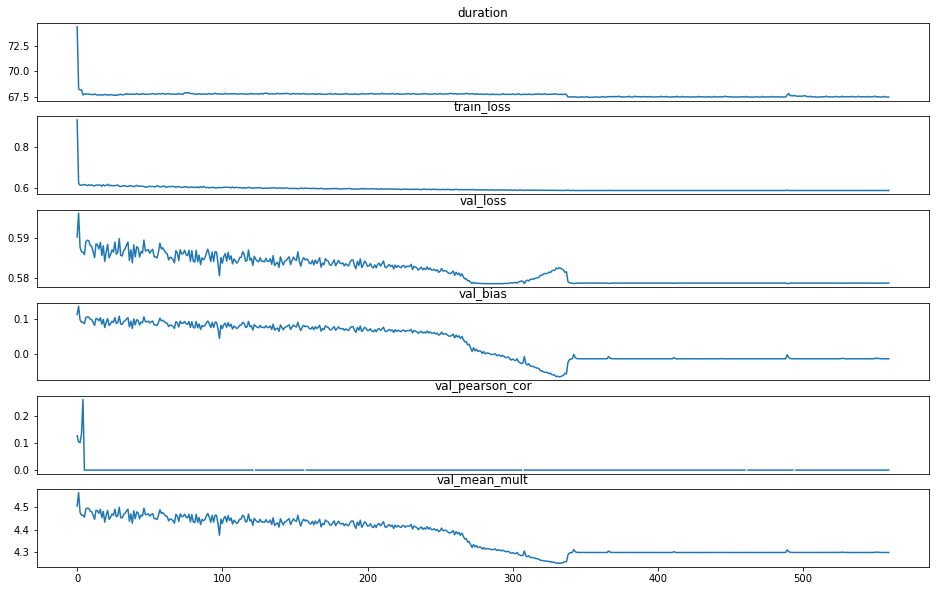

In [17]:
model_name = "080322_baseline"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 0
print("Current results:")
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    print('{}: \t {}'.format(key, hist[key][-1]))
    if i<len(keys)-1:
        ax[i].set_xticks([])

In [20]:
dataloader = baseline_dl        

print("Computing Test metrics")
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))

i=0
n_iter = 20
for (x, y) in dataloader:
    (x, y) = (x.to(device), y.to(device))
    pred = model(x)
    print(pred.item(), y.item())
    i += 1
    if i>=n_iter:
        break

test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=True)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

Computing Test metrics
2.680211342936126 1.9982593384236986
2.680211342936126 1.9982593384236986
2.680211342936126 1.9982593384236986
2.680211342936126 1.9982593384236986
2.680211342936126 1.9982593384236986
2.680211342936126 1.9982593384236986
2.680211342936126 1.9982593384236986
2.680211342936126 1.9982593384236986
2.680211342936126 1.9982593384236986
2.680211342936126 1.9982593384236986
2.680211342936126 3.0162407201619095
2.680211342936126 3.0162407201619095
2.680211342936126 3.0162407201619095
2.680211342936126 3.0162407201619095
2.680211342936126 3.0162407201619095
2.680211342936126 3.0162407201619095
2.680211342936126 3.0162407201619095
2.680211342936126 3.0162407201619095
2.680211342936126 3.0162407201619095
2.680211342936126 3.0162407201619095

Test metrics:
mse: 0.8366698098708181 
bias: 0.6212619060633704 
pearson_cor: 3.030161343006244e-16 
mean_mult: 6.27014081205496 
var_ratio: 4.035102888613683e-14 


name: 080322_baseline_ALR 
notes: mag + 5 lf features + adaptive learning rate 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_baseline/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080322_baseline_ALR 
114 epochs completed
Current results:
duration: 	 67.46134853363037
train_loss: 	 0.5874943063125604
val_loss: 	 0.5784526044913788
val_bias: 	 -0.0012298246075677778
val_pearson_cor: 	 7.892903467607097e-16
val_mean_mult: 	 4.310193416540107


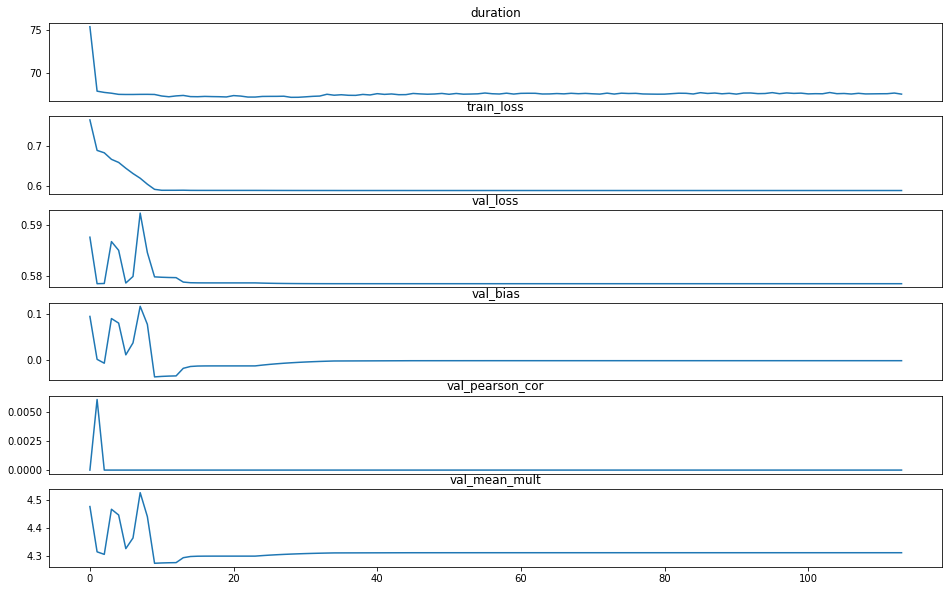

In [5]:
model_name = "080322_baseline_ALR"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 0
print("Current results:")
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    print('{}: \t {}'.format(key, hist[key][-1]))
    if i<len(keys)-1:
        ax[i].set_xticks([])

In [6]:
dataloader = baseline_dl        

print("Computing Test metrics")
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))

test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=True)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

Computing Test metrics

Test metrics:
mse: 0.8510046278632691 
bias: 0.6326935861204365 
pearson_cor: -2.0964755228377102e-17 
mean_mult: 6.349228416484514 
var_ratio: 3.9689536609314914e-14 


name: 080322_prop1 
notes: phase + 5 lf features 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_prop1/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080322_prop1 
557 epochs completed
Current results:
duration: 	 67.53619074821472
train_loss: 	 0.5868083684270188
val_loss: 	 0.5878048367500576
val_bias: 	 -0.019293320198379395
val_pearson_cor: 	 2.793109497126032e-15
val_mean_mult: 	 4.417468057283404


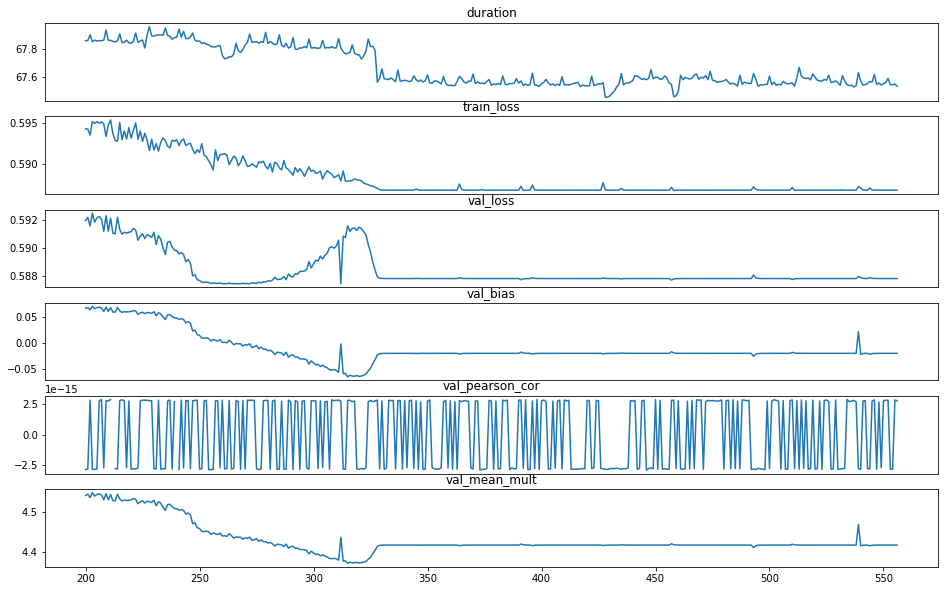

In [7]:
model_name = "080322_prop1"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 200
print('Current results:')
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    print('{}: \t {}'.format(key, hist[key][-1]))
    if i<len(keys)-1:
        ax[i].set_xticks([])

In [8]:
dataloader = prop1_dl        

print("Computing Test metrics")
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))

test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=True)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

Computing Test metrics

Test metrics:
mse: 0.8367063977191282 
bias: 0.6212913517616369 
pearson_cor: -3.930520147393471e-17 
mean_mult: 6.270343254957827 
var_ratio: 3.505909067156151e-14 


name: 080322_prop2 
notes: phase + 1st deriv lf 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_prop2/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080322_prop2 
541 epochs completed
Current results:
duration: 	 69.80526351928711
train_loss: 	 0.5892096662376767
val_loss: 	 0.5661723922789819
val_bias: 	 -0.022279289534718593
val_pearson_cor: 	 -5.197627985956338e-15
val_mean_mult: 	 4.232809357903675


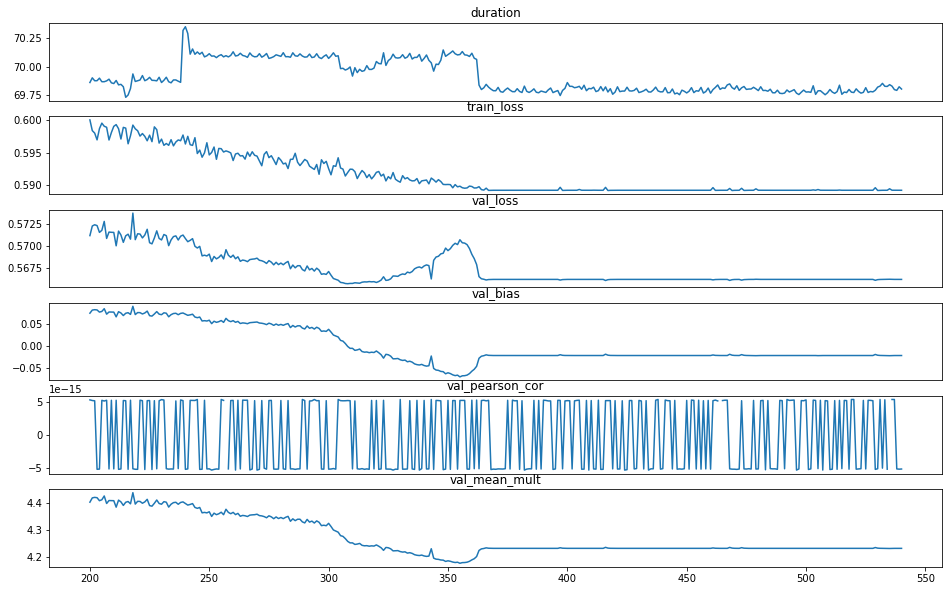

In [9]:
model_name = "080322_prop2"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 200
print('Current results:')
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    print('{}: \t {}'.format(key, hist[key][-1]))

    if i<len(keys)-1:
        ax[i].set_xticks([])

In [10]:
dataloader = prop2_dl        

print("Computing Test metrics")
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))

test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=True)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

Computing Test metrics

Test metrics:
mse: 0.8370446361740895 
bias: 0.6215634981470227 
pearson_cor: 7.6474107135232e-17 
mean_mult: 6.272214605204131 
var_ratio: 3.1751629287451934e-14 


name: 080322_prop3 
notes: mag+ lf phase + lf 1st deriv 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_prop3/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080322_prop3 
451 epochs completed
Current results:
duration: 	 82.27700901031494
train_loss: 	 0.5882115663862589
val_loss: 	 0.5746739491836728
val_bias: 	 -0.0073940736200950735
val_pearson_cor: 	 4.5210754638211055e-15
val_mean_mult: 	 4.254971567504023


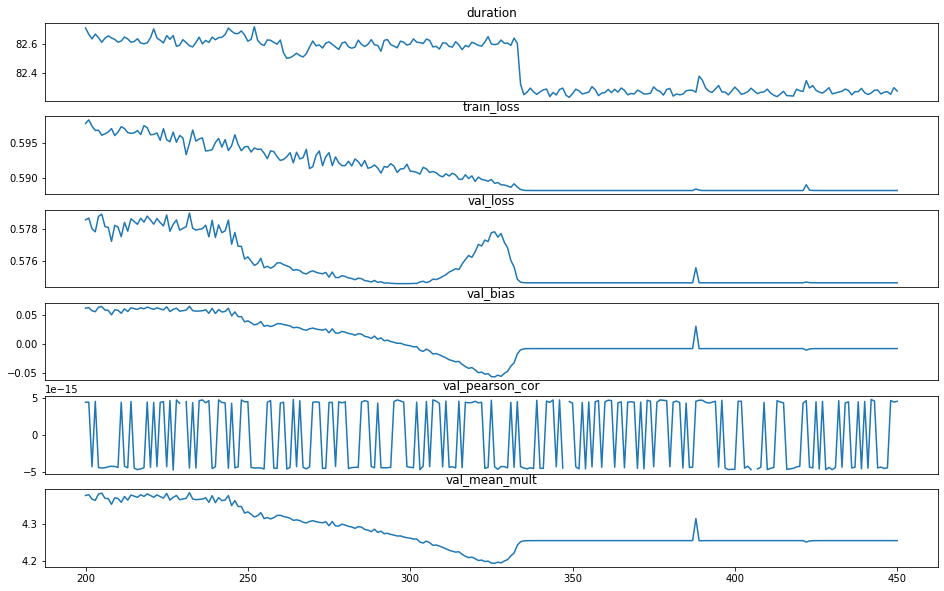

In [11]:
model_name = "080322_prop3"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 200
print('Current results:')
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    
    print('{}: \t {}'.format(key, hist[key][-1]))
    if i<len(keys)-1:
        ax[i].set_xticks([])

In [12]:
dataloader = prop3_dl        

print("Computing Test metrics")
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))

test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=True)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

Computing Test metrics

Test metrics:
mse: 0.8400473494698135 
bias: 0.6239742747297224 
pearson_cor: -8.95506785991354e-17 
mean_mult: 6.2888161456763845 
var_ratio: 5.754982808350663e-14 


name: 080322_prop4 
notes: mag+ lf phase + lf 5 feats 
data_path: /scratch/ci411/sonos_rirs/features/080322_10k_prop4/feature_df.csv 
model_path: /scratch/ci411/sonos_rirs/models/080322_prop4 
464 epochs completed
Current results:
duration: 	 81.53676080703735
train_loss: 	 0.5888481537233019
val_loss: 	 0.5709884643312886
val_bias: 	 -0.06460345951023977
val_pearson_cor: 	 -3.800101725714581e-15
val_mean_mult: 	 4.280966437408336


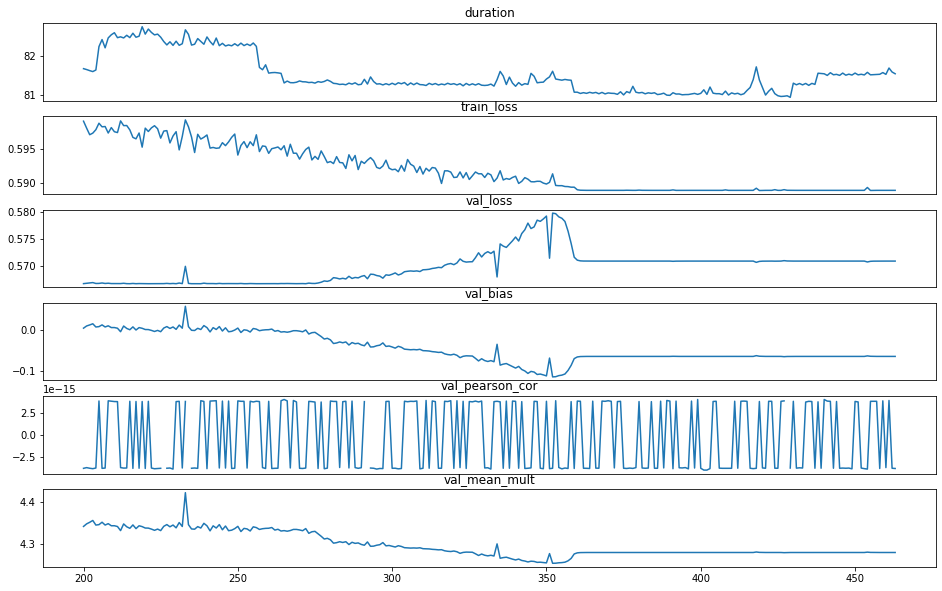

In [13]:
model_name = "080322_prop4"
hist_dir = os.path.join(MODELS_DIR, model_name, 'hist.json')
json_spec = os.path.join(MODELS_DIR, model_name, model_name+'_spec.json')

with open(hist_dir) as f:
    hist = json.load(f)
    
with open(json_spec) as f:
    spec = json.load(f)
    
for key, item in spec.items():
    print("{}: {} ".format(key,item))
    
keys = list(hist.keys())
n_epochs = len(hist[keys[0]])
print("{} epochs completed".format(n_epochs))
t = np.arange(n_epochs)
fig, ax = plt.subplots(len(keys),1, figsize=(16,10))


cutoff = 200
print('Current results:')
for i, key in enumerate(keys):
    ax[i].plot(t[cutoff:], hist[key][cutoff:])
    ax[i].set_title(key)
    print('{}: \t {}'.format(key, hist[key][-1]))
    if i<len(keys)-1:
        ax[i].set_xticks([])

In [14]:
dataloader = prop4_dl        

print("Computing Test metrics")
features, labels = next(iter(dataloader))
input_height = features.size()[2]
input_width = features.size()[3]

model = model_funcs.Baseline_Model((input_height, input_width)).to(device)
model.load_state_dict(torch.load(os.path.join(MODELS_DIR,model_name,'model_state.pt'), map_location=torch.device('cpu')))

test_metrics = model_funcs.compute_eval_metrics(dataloader, model, log=True)
print("\nTest metrics:")
for key, item in test_metrics.items():
    print("{}: {} ".format(key,item))

Computing Test metrics

Test metrics:
mse: 0.8314760416191559 
bias: 0.6170677334570492 
pearson_cor: -2.609727594937459e-16 
mean_mult: 6.241372011351486 
var_ratio: 4.1012521162958747e-14 
